# Conjugate Priors

Today we'll look at Bayesian inference using conjugate priors.

We'll start by working with the MNIST dataset. We'll try to learn the mean of the distribution from samples, using a Gaussian prior as an initialization.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits(n_class=1)
images = digits.images
n_max = len(images)

#prior hyperparameters
mu_0 = np.zeros(64)
Sigma_0 = np.eye(64,64)

#likelihood function covariance
Sigma = np.eye(64,64)

With the prior and likelihood function defined, we'll estimate the mean for a few different numbers of measurements. We'll see how the estimate mean and covariance evolve as we take more Bayes rule steps.

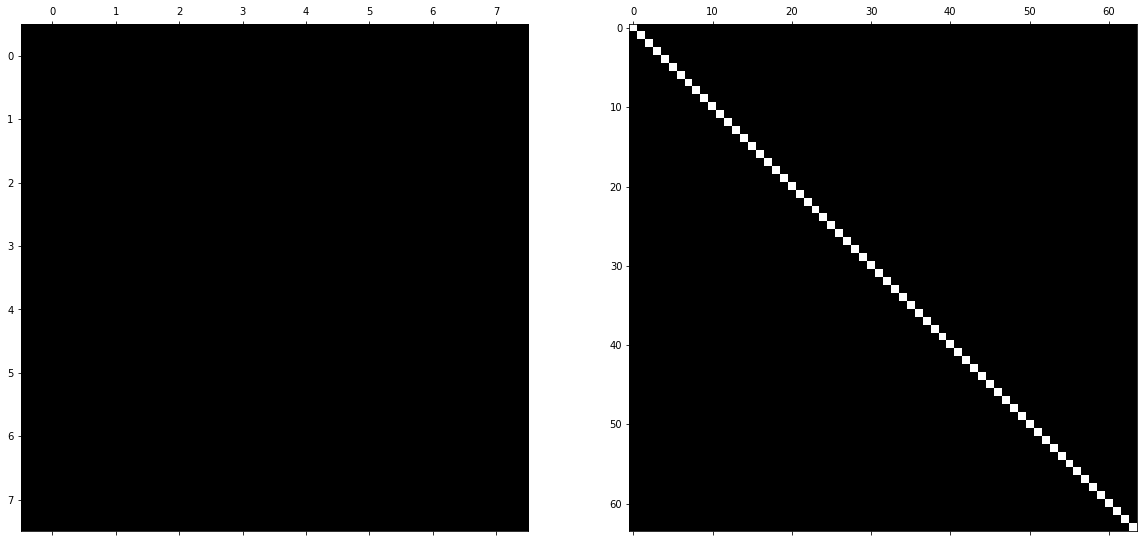

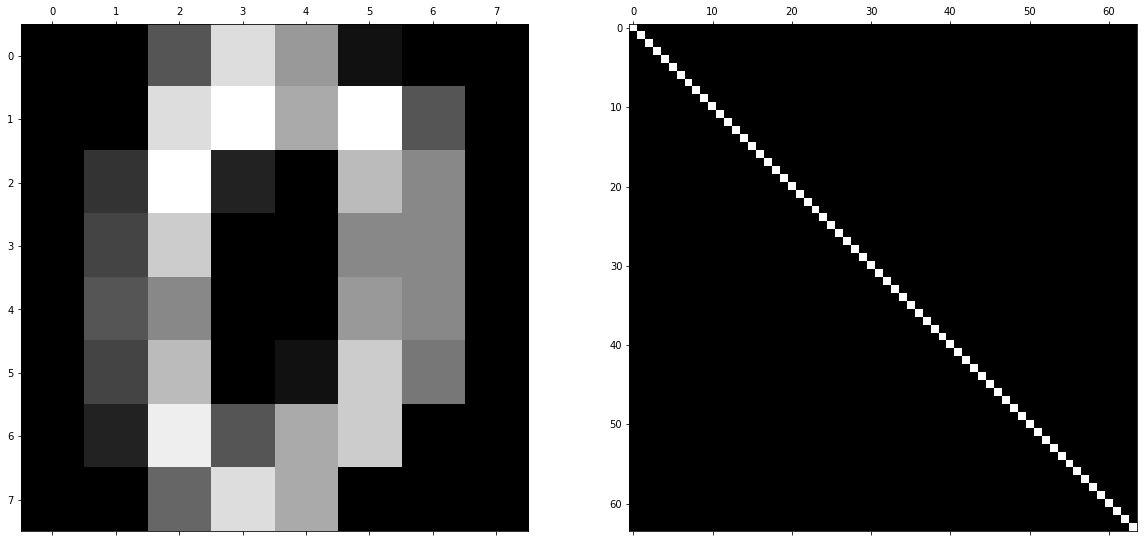

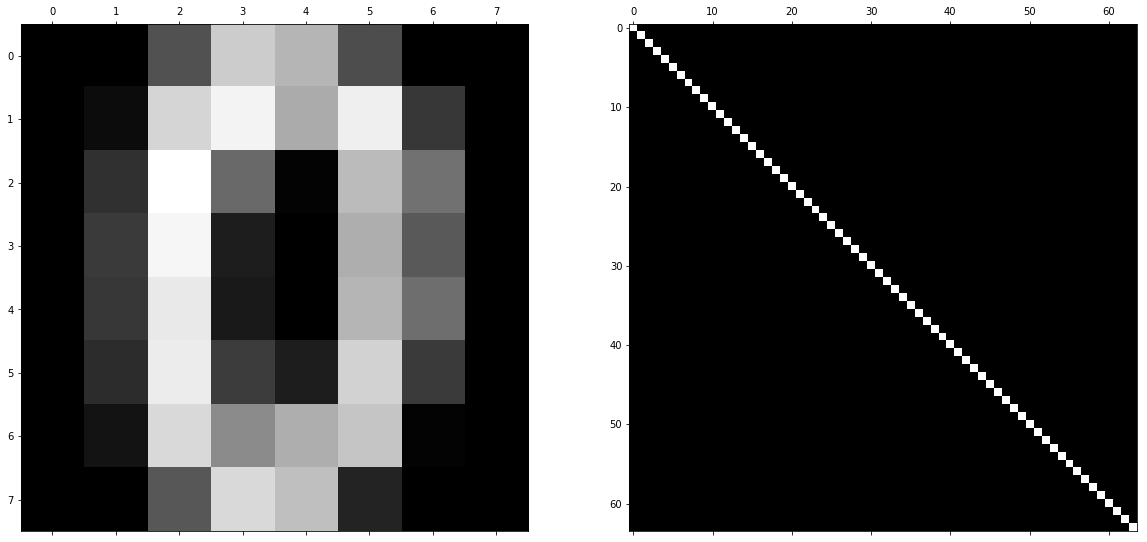

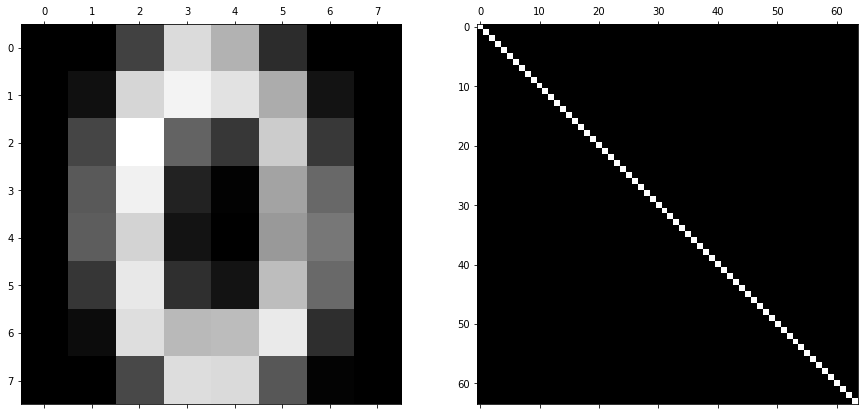

In [8]:
#First, show the prior
fig, axs = plt.subplots(ncols=2, figsize=(20, 20))
axs[0].matshow(np.reshape(mu_0,(8,8)),cmap=plt.cm.gray)
axs[1].matshow(Sigma_0,cmap=plt.cm.gray)
plt.show()

#Let's estimate using a single image
mu_theta_y = np.linalg.inv(np.linalg.inv(Sigma_0) + np.linalg.inv(Sigma))@(np.linalg.inv(Sigma_0)@mu_0 + np.linalg.inv(Sigma)@images[0].flatten())
Sigma_theta_y = np.linalg.inv(np.linalg.inv(Sigma_0) + np.linalg.inv(Sigma))

fig, axs = plt.subplots(ncols=2, figsize=(20, 20))
axs[0].matshow(np.reshape(mu_theta_y,(8,8)),cmap=plt.cm.gray)
axs[1].matshow(Sigma_theta_y,cmap=plt.cm.gray)
plt.show()

#Let's estimate using n=5 images
n = 5
mu_theta_y = np.linalg.inv(np.linalg.inv(Sigma_0) + n*np.linalg.inv(Sigma))@(np.linalg.inv(Sigma_0)@mu_0 + n*np.linalg.inv(Sigma)@np.mean(images[0:n],0).flatten())
Sigma_theta_y = np.linalg.inv(np.linalg.inv(Sigma_0) + n*np.linalg.inv(Sigma))

fig, axs = plt.subplots(ncols=2, figsize=(20, 20))
axs[0].matshow(np.reshape(mu_theta_y,(8,8)),cmap=plt.cm.gray)
axs[1].matshow(Sigma_theta_y,cmap=plt.cm.gray)
plt.show()

#Let's estimate using n=50 images
n = 50
mu_theta_y = np.linalg.inv(np.linalg.inv(Sigma_0) + n*np.linalg.inv(Sigma))@(np.linalg.inv(Sigma_0)@mu_0 + n*np.linalg.inv(Sigma)@np.mean(images[0:n],0).flatten())
Sigma_theta_y = np.linalg.inv(np.linalg.inv(Sigma_0) + n*np.linalg.inv(Sigma))

fig, axs = plt.subplots(ncols=2, figsize=(15, 15))
axs[0].matshow(np.reshape(mu_theta_y,(8,8)),cmap=plt.cm.gray)
axs[1].matshow(Sigma_theta_y,cmap=plt.cm.gray)
plt.show()

As the number of samples increases, we stabilize our estimate of the mean on the average of the images. It's hard to see from the plot, but the estimate covariance is falling off as the number of samples as well.

Next we'll work with a Bernoulli distribution with a Beta prior. To make things interesting, we'll try a rather informative prior.

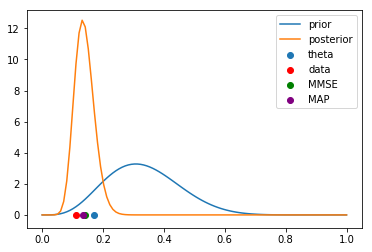

In [15]:
alpha = 5;
beta = 10;

theta = np.random.beta(alpha,beta)
NUM_POINTS = 100
theta_values = np.linspace(0,1,NUM_POINTS)

p_theta = 1/sp.special.beta(alpha,beta)*theta_values**(alpha-1)*(1-theta_values)**(beta-1)

n=100
y = np.random.binomial(n,theta)
alpha_new = alpha+y
beta_new = beta + n - y
p_theta_y = 1/sp.special.beta(alpha_new,beta_new)*theta_values**(alpha_new-1)*(1-theta_values)**(beta_new-1)

theta_MMSE = alpha_new/(alpha_new+beta_new) 
theta_MAP = (alpha_new-1)/(alpha_new+beta_new-2)

plt.plot(theta_values,p_theta)
plt.plot(theta_values,p_theta_y)
plt.scatter(theta,0)
plt.scatter(y/n,0,color="red")
plt.scatter(theta_MMSE,0,color="green")
plt.scatter(theta_MAP,0,color="purple")
plt.legend(['prior','posterior','theta','data','MMSE','MAP'])
plt.show()

Finally, we will work with the categorical/multinomial distribution. We will do this by working with the Twenty Newsgroups dataset that you will use in your final project. Specifically, we'll use the sci.space newsgroup and learn a distribution on its words.

In [16]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

MAX_WORDS = 100

newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'),categories=['sci.space'])

#This code extracts the  most commonly used words in the newsgroup
cv = CountVectorizer(max_features=MAX_WORDS)
counts = cv.fit_transform(newsgroups_train.data)

#Let's print out the words to see what they are
words = cv.get_feature_names()
print(words)

['10', 'about', 'all', 'also', 'an', 'and', 'any', 'are', 'as', 'at', 'available', 'be', 'been', 'but', 'by', 'can', 'could', 'data', 'do', 'don', 'earth', 'edu', 'first', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'how', 'if', 'in', 'information', 'into', 'is', 'it', 'its', 'just', 'know', 'launch', 'like', 'lunar', 'may', 'mission', 'moon', 'more', 'much', 'my', 'nasa', 'new', 'no', 'not', 'of', 'on', 'one', 'only', 'or', 'orbit', 'other', 'out', 'people', 'program', 'satellite', 'shuttle', 'so', 'some', 'space', 'system', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'these', 'they', 'think', 'this', 'time', 'to', 'up', 'us', 'use', 'very', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'would', 'year', 'years', 'you', 'your']


Now, we want to learn the probability distribution over these 100 words: how likely is a word, randomly pulled from this dataset, to show up? Let's suppose a Dirichlet prior *over this distribution*, and in fact we will suppose a *symmetric* prior, with each alpha_i equal to each other.

Then, we will find the posterior, which is still a Dirichlet, and find the MMSE and MAP estimates of the distribution over these 100 words.

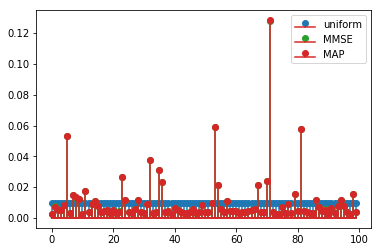

In [29]:
alpha = 10 #1 corresponds to a uniform distribution over the distributions; higher values concentrate the prior around the uniform distribution

n = 500
y = np.array(np.sum(counts[0:n,:],0))
y = np.reshape(y,(MAX_WORDS,))
alpha_new = alpha + y

theta_MMSE = alpha_new/np.sum(alpha_new)
theta_MAP = (alpha_new-1)/np.sum(alpha_new-1)

plt.stem(1/MAX_WORDS*np.ones(MAX_WORDS),linefmt='C0',markerfmt='C0o')
plt.stem(theta_MMSE,linefmt='C2',markerfmt='C2o')
plt.stem(theta_MAP,linefmt='C3',markerfmt='C3o')
plt.legend(['uniform','MMSE','MAP'])
plt.show()

Note that the final distribution is rather spiky. This is a common occurance in language processing. Some words are extremely common, but most are quite rare and will not show up often in the dataset. This can make estimating the distribution challenging. More sophisticated NLP methods perform feature engineering and inference that accounts for the sparsity of words, especially when considering *all* of the words in a dataset instead of the 100 most popular.

But for now, this is a perfectly good way of estimating the distribution.

In [28]:
words[71]

'the'

In [19]:
newsgroups_train.data[4]

'I just got out of the Army. Go signal corps or Intelligence; \nphotointelligence interpretation. If you go ADA you might get to play with \nrockets but space will look pretty far away dug in the mud next to a grunt \nprotecting the foward troops from low flying objects. Good Luck  \n '